# 数値微分

仮に、10分で2km = 0.2 km/分 という速度があったとする。これはあくまで「平均速度」でしかない。  
では、「ある瞬間の速度」を知りたい場合(スタート直後の速度とか)は？…これが微分。

$$
    \frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x+h) - f(x)}{h}
$$

関数$f(x)$の、$x$のある瞬間の値がどれくらい変化するのか、という公式。変化量は$h$で、$h$は限りなく$0$に近い、という意味になる。

ただし、数値での計算では限界がある。コンピューターであればなおさら、数値の型には上限・下限があるからだ。

In [1]:
def numerical_diff(f, x):
    """
    中心差分による数値微分を計算します
    
    Parameters
    ----------
    f : function
        微分を求めたい、1つの引数を受け付ける関数
    x : any
        fに入れる値  
    """
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


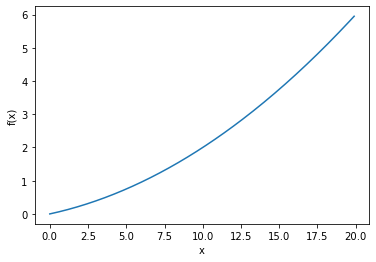

In [2]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 0~20の、0.1刻みの値
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

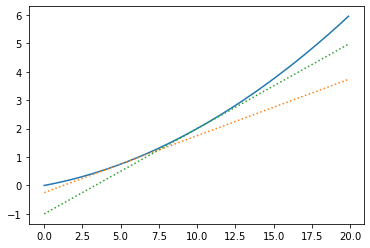

In [3]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)
y2 = tf(x)
tf = tangent_line(function_1, 10)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2, linestyle="dotted")
plt.plot(x, y3, linestyle="dotted")
plt.show()

## 偏微分

複数の引数がある関数の微分をする場合、どの値がどれくらいの値を変化させるのかを知るには **偏微分** を使う。

In [4]:
def func1(x0, x1):
    """
    x_0^2 + x_1^2 を求める
    """
    return x0*x0 + x1**2.0

In [5]:
# x0 = 3, x1 = 4の時の、x0の偏微分を求める
def func_tmp1(x0):
    return func1(x0, 4.0)
numerical_diff(func_tmp1, 3)

6.00000000000378

In [6]:
# x0 = 3. x1 = 4の時の、x1の偏微分を求める
def func_tmp1(x1):
    return func1(3, x1)
numerical_diff(func_tmp1, 4)

7.999999999999119